In [2]:
pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.68.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached optre

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load dataset paths
train_path = "train"
test_path = "test"
train_csv_path = "Training_set.csv"
test_csv_path = "Testing_set.csv"

In [3]:
# Load CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [4]:
# Store the original categories
categories = train_df['label'].astype('category').cat.categories

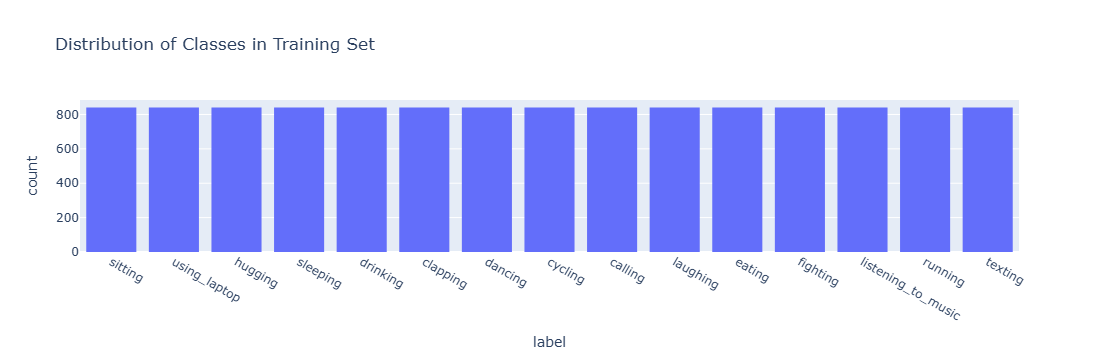

In [5]:
# Distribution of classes in training set
fig = px.histogram(train_df, x='label', title='Distribution of Classes in Training Set')
fig.show()

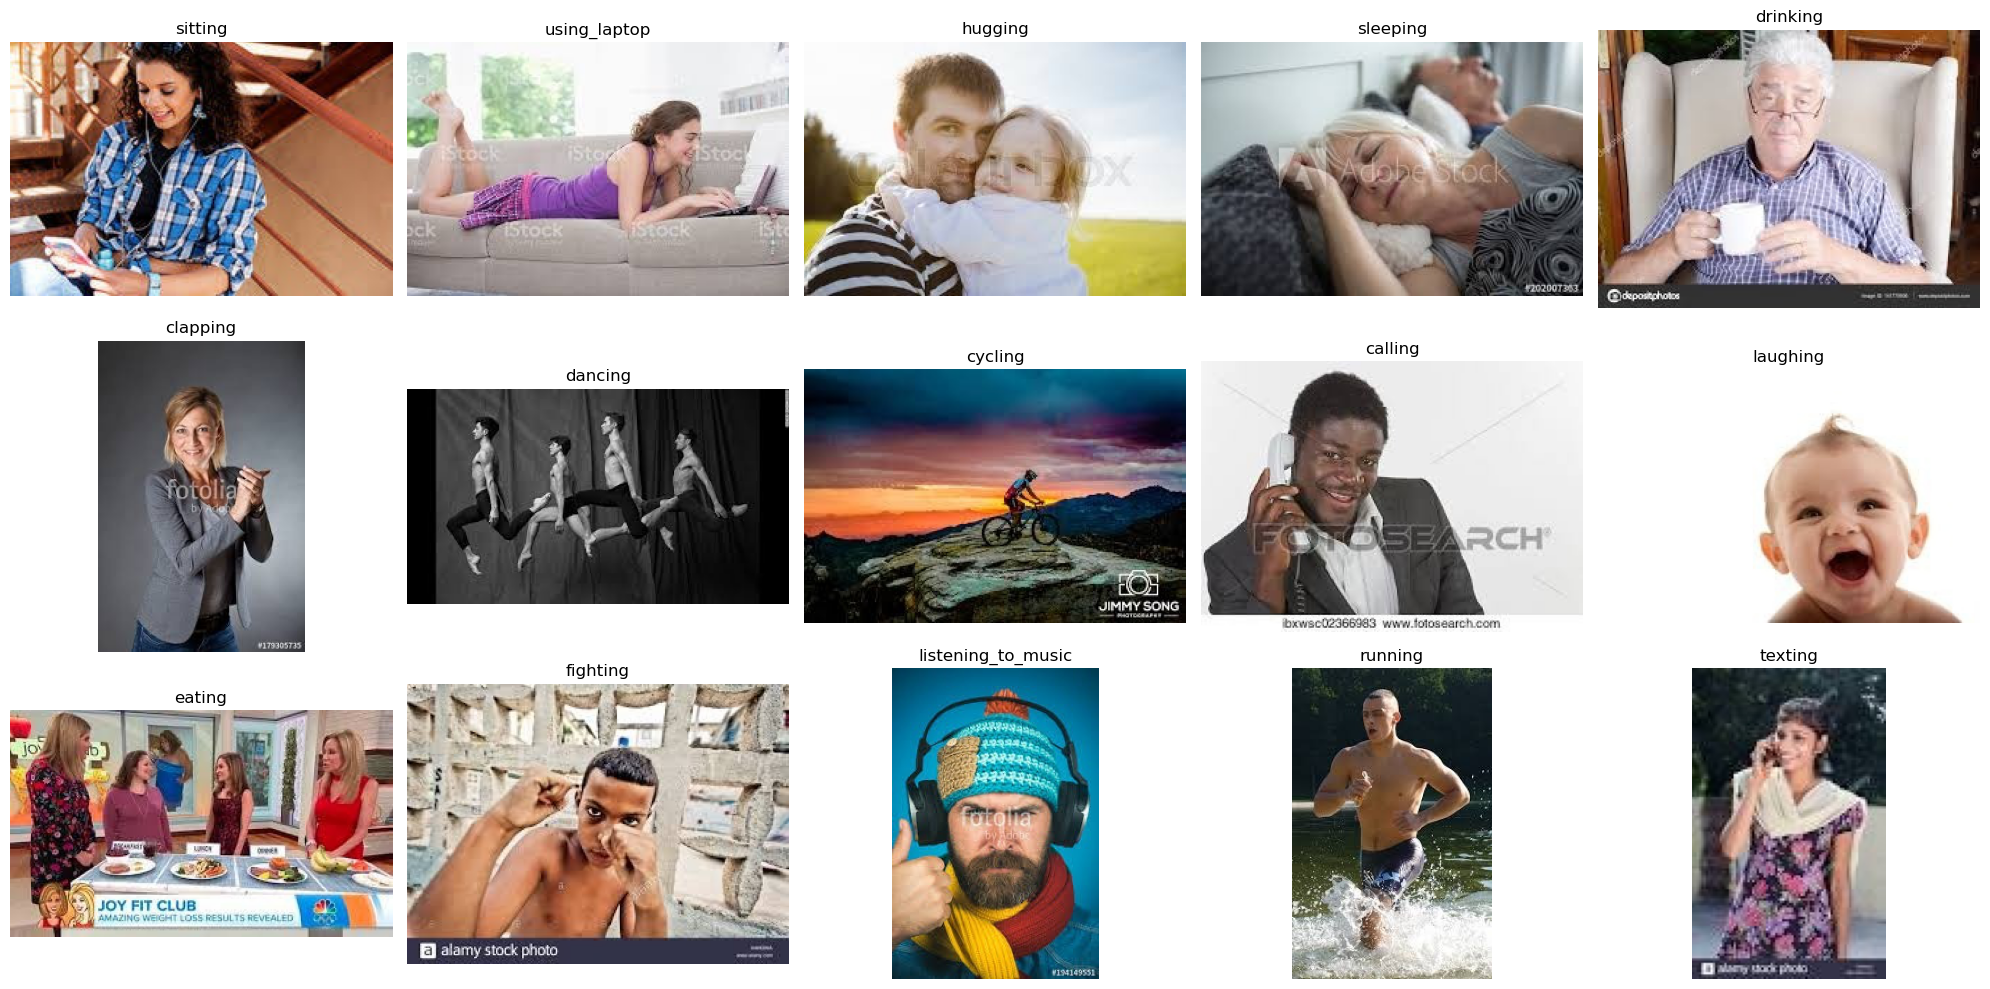

In [6]:
# Images from each class
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.flatten()
for idx, class_name in enumerate(train_df['label'].unique()):
    class_images = train_df[train_df['label'] == class_name]['filename'].values
    img = plt.imread(os.path.join(train_path, class_images[0]))
    axes[idx].imshow(img)
    axes[idx].set_title(class_name)
    axes[idx].axis('off')
plt.tight_layout()
plt.show()

In [7]:
# Data Preprocessing
train_df['label'] = train_df['label'].astype('category')
train_df['label'] = train_df['label'].cat.codes
train_df['filepath'] = train_df['filename'].apply(lambda x: os.path.join(train_path, x))

In [8]:
# Split training and validation set
train_set, val_set = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

In [9]:
def load_image(filepath, label):
    image = tf.io.read_file(filepath)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128])
    image = image / 255.0
    return image, label

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_set['filepath'].values, train_set['label'].values))
train_dataset = train_dataset.map(load_image).batch(32).shuffle(buffer_size=len(train_set))

val_dataset = tf.data.Dataset.from_tensor_slices((val_set['filepath'].values, val_set['label'].values))
val_dataset = val_dataset.map(load_image).batch(32)

In [10]:
# Model Building
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(15, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [11]:
# Model Training
history = model.fit(train_dataset, validation_data=val_dataset, epochs=30)

Epoch 1/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 129s 358ms/step - accuracy: 0.0719 - loss: 2.7142 - val_accuracy: 0.1321 - val_loss: 2.5971
Epoch 2/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 92s 276ms/step - accuracy: 0.1736 - loss: 2.5159 - val_accuracy: 0.2143 - val_loss: 2.3822
Epoch 3/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 90s 273ms/step - accuracy: 0.2792 - loss: 2.2381 - val_accuracy: 0.2956 - val_loss: 2.1595
Epoch 4/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 93s 283ms/step - accuracy: 0.3451 - loss: 2.0077 - val_accuracy: 0.3183 - val_loss: 2.0686
Epoch 5/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 89s 269ms/step - accuracy: 0.4381 - loss: 1.7346 - val_accuracy: 0.3357 - val_loss: 2.0919
Epoch 6/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 117s 359ms/step - accuracy: 0.5256 - loss: 1.4698 - val_accuracy: 0.3313 - val_loss: 2.2073
Epoch 7/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 219s 668ms/step - accuracy: 0.5885 - loss: 1.2273 - val_accuracy: 0.3310 - val_loss: 2.2805
Epoch 8/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 211s 643ms/step - accuracy: 0.6636 - los

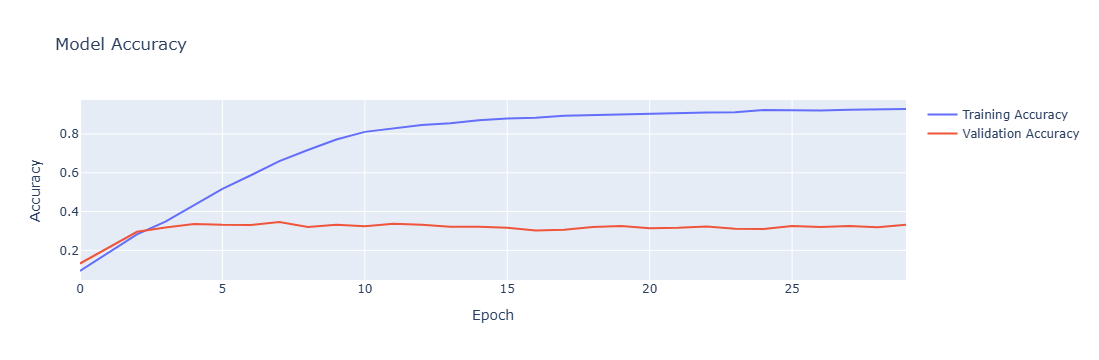

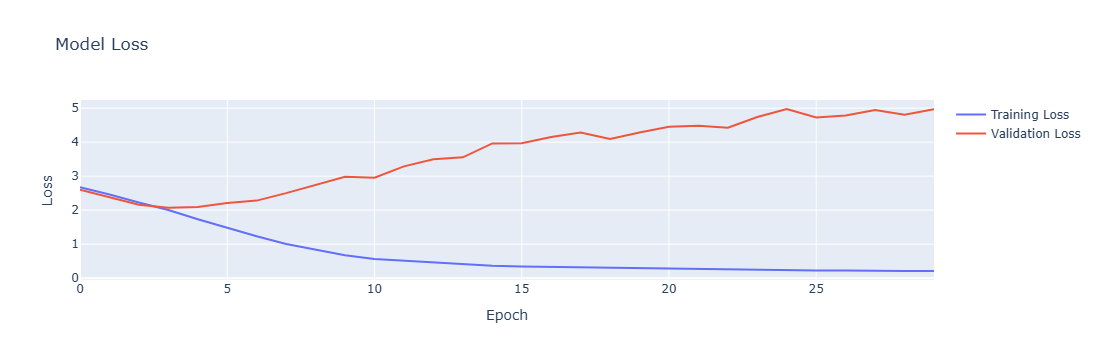

In [12]:
# Plot Training and Validation Accuracy
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(history.history['accuracy'])), y=history.history['accuracy'], mode='lines', name='Training Accuracy'))
fig.add_trace(go.Scatter(x=np.arange(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], mode='lines', name='Validation Accuracy'))
fig.update_layout(title='Model Accuracy', xaxis_title='Epoch', yaxis_title='Accuracy')
fig.show()

# Plot Training and Validation Loss
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(history.history['loss'])), y=history.history['loss'], mode='lines', name='Training Loss'))
fig.add_trace(go.Scatter(x=np.arange(len(history.history['val_loss'])), y=history.history['val_loss'], mode='lines', name='Validation Loss'))
fig.update_layout(title='Model Loss', xaxis_title='Epoch', yaxis_title='Loss')
fig.show()

In [13]:
# Predictions on validation set
val_predictions = np.argmax(model.predict(val_dataset), axis=-1)
val_labels = np.concatenate([y.numpy() for x, y in val_dataset], axis=0)

# Classification Report
print(classification_report(val_labels, val_predictions, target_names=categories))

79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step
                    precision    recall  f1-score   support

           calling       0.22      0.22      0.22       168
          clapping       0.33      0.26      0.29       168
           cycling       0.60      0.63      0.61       168
           dancing       0.31      0.46      0.37       168
          drinking       0.23      0.18      0.20       168
            eating       0.44      0.45      0.44       168
          fighting       0.35      0.41      0.38       168
           hugging       0.30      0.24      0.27       168
          laughing       0.37      0.36      0.37       168
listening_to_music       0.29      0.21      0.24       168
           running       0.43      0.42      0.42       168
           sitting       0.17      0.24      0.20       168
          sleeping       0.40      0.39      0.39       168
           texting       0.15      0.09      0.11       168
      using_laptop       0.34      0.40      0.37       1

In [14]:
from collections import Counter
print(Counter(val_labels))


Counter({1: 168, 12: 168, 14: 168, 6: 168, 0: 168, 7: 168, 11: 168, 2: 168, 4: 168, 5: 168, 10: 168, 9: 168, 3: 168, 13: 168, 8: 168})


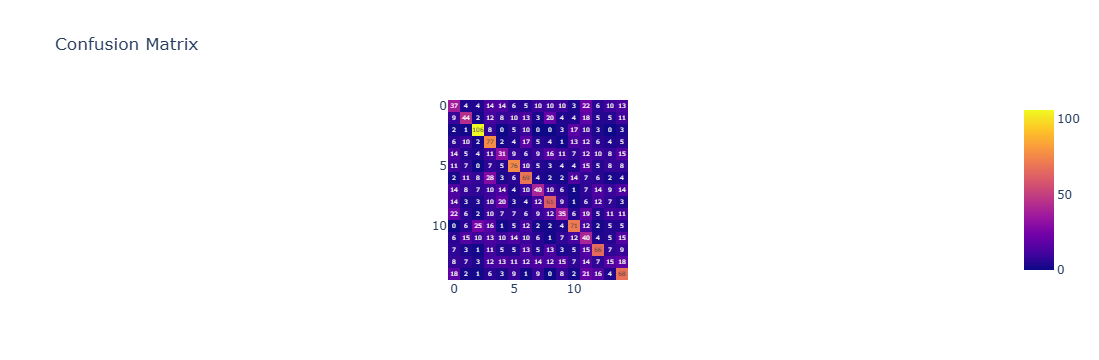

In [15]:
# Confusion Matrix
conf_matrix = confusion_matrix(val_labels, val_predictions)
fig = px.imshow(conf_matrix, text_auto=True, title='Confusion Matrix')
fig.show()

In [16]:
# Save model
model.save('human_action_recognition_model.keras')

In [17]:
# Prepare test data
test_df['filepath'] = test_df['filename'].apply(lambda x: os.path.join(test_path, x))

test_dataset = tf.data.Dataset.from_tensor_slices(test_df['filepath'].values)
test_dataset = test_dataset.map(lambda x: (tf.image.resize(tf.image.decode_jpeg(tf.io.read_file(x), channels=3), [128, 128]) / 255.0)).batch(32)

In [18]:
# Predict on test set
test_predictions = np.argmax(model.predict(test_dataset), axis=-1)
test_df['label'] = test_predictions

169/169 ━━━━━━━━━━━━━━━━━━━━ 43s 223ms/step


In [19]:

# Map label codes back to class names
label_map = {i: label for i, label in enumerate(categories)}
test_df['label'] = test_df['label'].map(label_map)

In [22]:
# Prepare submission
submission = test_df[['filename', 'label']]
submission.to_csv('submission.csv', index=False)

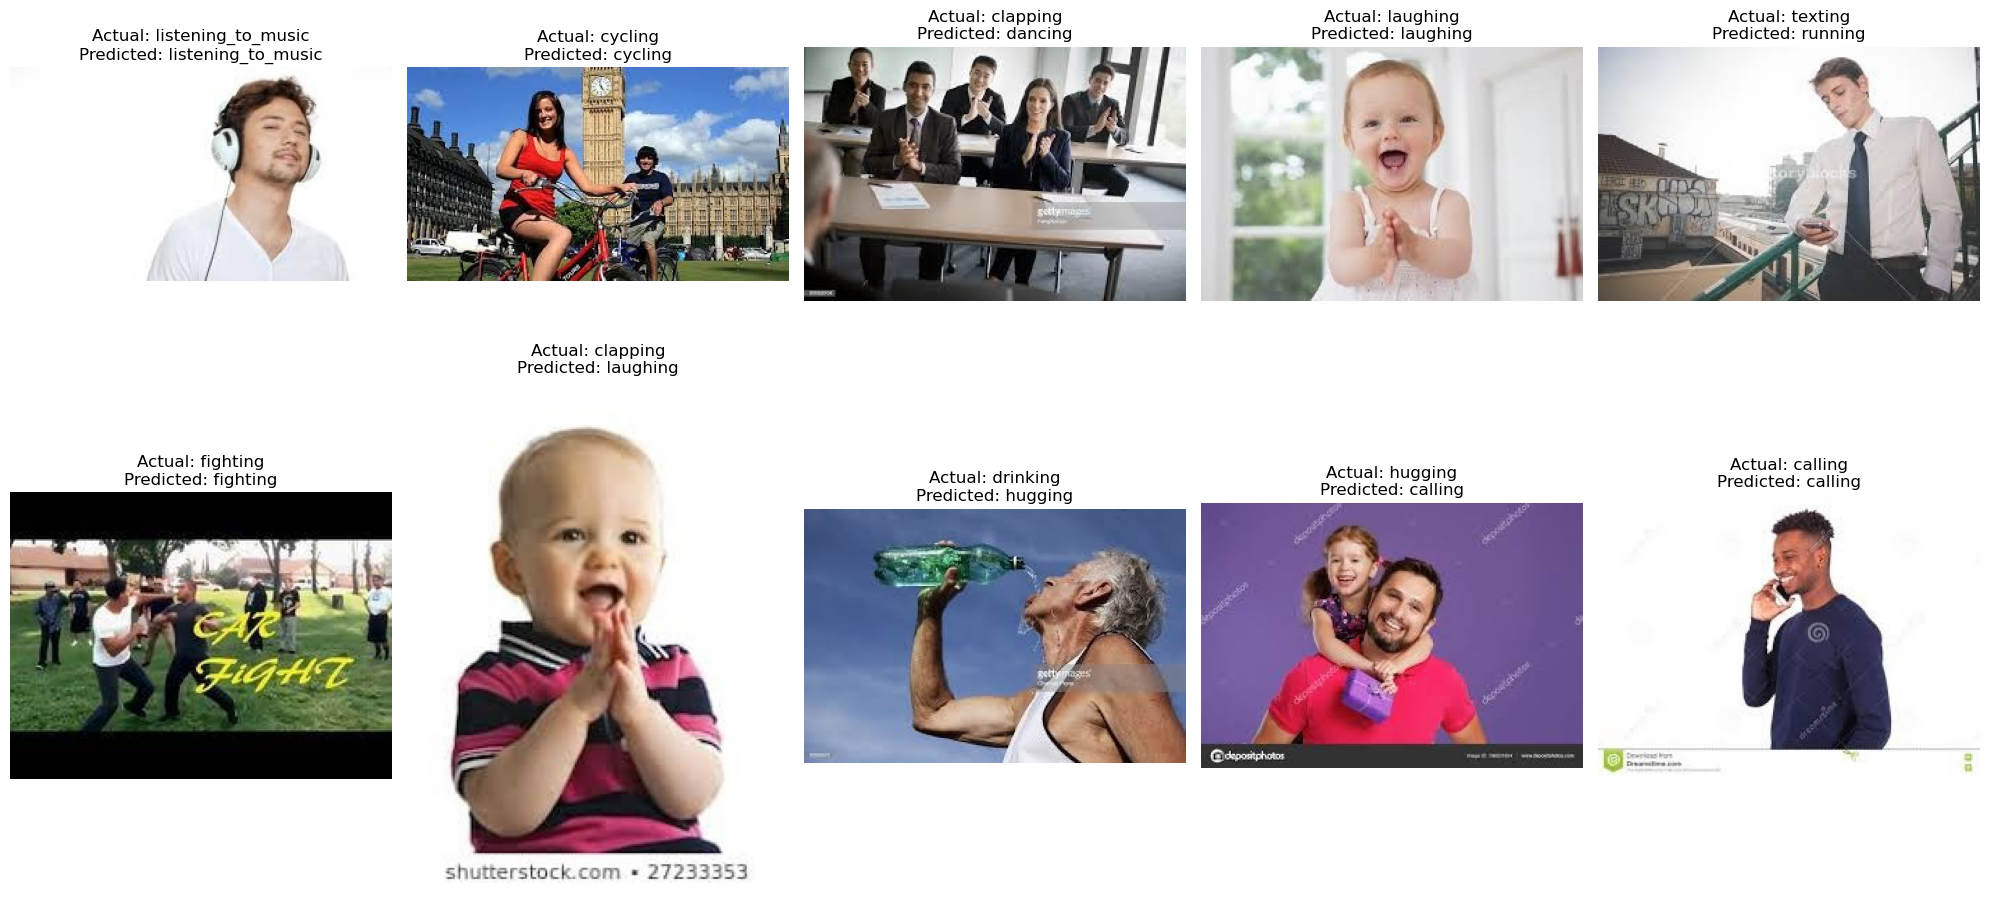

In [23]:
# Show 10 images with actual and predicted labels from validation set
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()
sampled_val_set = val_set.sample(10, random_state=42)
for i, (index, row) in enumerate(sampled_val_set.iterrows()):
    img = plt.imread(row['filepath'])
    actual_label = categories[row['label']]
    predicted_label = categories[val_predictions[val_set.index.get_loc(index)]]
    axes[i].imshow(img)
    axes[i].set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()